__Problem Statement:__ 

ABC Company wants to perform some text analysis and make visualization for one it’s
dataset. The dataset has been taken from Kaggle. (https://www.kaggle.com/crowdflower/twitter-airlinesentiment/home). This is a dataset having tweets about six US Airlines along with their sentiments: positive, negative, and neutral. You are provided with this dataset named “Tweets.csv”. It has tweets in ‘text’ column and sentiments in ‘airline_sentiment’ column.

__Objective:__ 
    
Extract all verb phrases from their dataset and save them in different lines in a file named “Verb Phrases for (airline_sentiment) Review .txt” (You can choose your own grammar for noun phrase). 

Here <airline_sentiment>
will have three different values: positive , negative, and neutral. Hence, three files will be created. 

For each sentiment, make a well labeled pie chart showing the distribution of noun phrases and verb phrases of that sentiment from the data set. Use the files created above to get the frequencies.


In [1]:
import pandas as pd
df=pd.read_csv('Tweets.csv')
df=df[['text','airline_sentiment']]

In [2]:
import nltk
def GetVerbPhrases(s):
    try:
        sentences = nltk.sent_tokenize(s)
        sentences = [nltk.word_tokenize(sent) for sent in sentences]
        sentences = [nltk.pos_tag(sent) for sent in sentences]
    except:
        return []
    else:
        grammar=r"VP:{<VB|VBD|VBG|VBZ|VBP|VBN>*<VB|VBD|VBG|VBZ|VBP|VBN><RB|RBR>*<RB|RBR>}"
        cp = nltk.RegexpParser(grammar)
        noun_phrases_list = [[' '.join(leaf[0] for leaf in tree.leaves())
                            for tree in cp.parse(sent).subtrees()
                            if tree.label()=='VP']
                            for sent in sentences]
    return noun_phrases_list

In [3]:
import itertools
for group,sub in df.groupby('airline_sentiment'):
    verb_phrases=map(lambda x: GetVerbPhrases(x),sub['text'])
    verb_phrases=list(itertools.chain.from_iterable(verb_phrases))
    AllVerbPhrases=set(list(itertools.chain.from_iterable(verb_phrases)))
    filename="Verb Phrases for "+str(group)+" Review .txt"
    file=open(filename,'a')
    for each in AllVerbPhrases:
        file.write(each+"\n")
file.close()

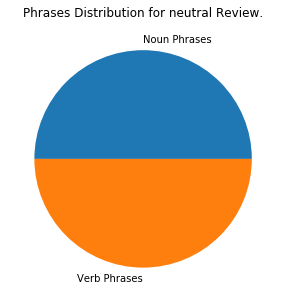

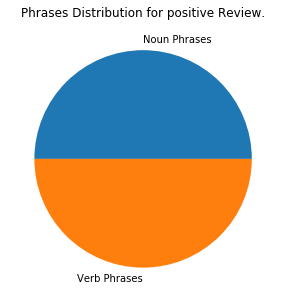

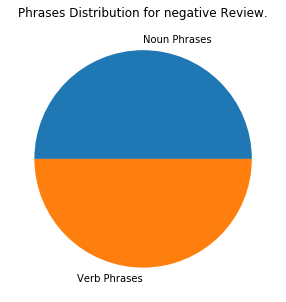

In [4]:
#Plotting a pie chart
def PlotPieChart(sentiment):
    noun_phrase_file="Noun Phrases for "+str(sentiment)+" Review .txt"
    verb_phrase_file="Verb Phrases for "+str(sentiment)+" Review .txt"
    noun_phrase_count=len(noun_phrase_file.split("\n"))
    verb_phrase_count=len(verb_phrase_file.split("\n"))
    counts=[noun_phrase_count,verb_phrase_count]
    labels=['Noun Phrases','Verb Phrases']
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(5,5))
    plt.pie(counts,labels=labels)
    plt.title("Phrases Distribution for "+str(sentiment)+" Review.")
    plt.show()
for each in df['airline_sentiment'].unique():
    PlotPieChart(each)